# Decision tree: four trees with majority vote

In [192]:
from sklearn import tree
from sklearn import preprocessing
import pandas as pd
import numpy as np
from collections import Counter
#import os
import pydotplus 
from io import StringIO
from IPython.display import display, Image
from sklearn.externals.six import StringIO
import random

In [191]:
table1 = pd.read_excel("Data Merged( Kaggle TMDB Studio, no NAs).xlsx", index_col=0)

In [197]:
x = np.random.rand(100, 5)
training_idx = np.random.randint(x.shape[0], size=80)
test_idx = np.random.randint(x.shape[0], size=20)
training, test = x[training_idx,:], x[test_idx,:]
test

array([[ 0.32190958,  0.82698631,  0.6330684 ,  0.92991187,  0.83577551],
       [ 0.61120257,  0.85618939,  0.40061612,  0.68398285,  0.59127828],
       [ 0.23349741,  0.31881907,  0.47351692,  0.2030799 ,  0.27287064],
       [ 0.7998489 ,  0.84529637,  0.6166518 ,  0.45432702,  0.40202843],
       [ 0.89989058,  0.44477551,  0.01702175,  0.05332326,  0.3588648 ],
       [ 0.45524118,  0.25904393,  0.58804736,  0.25122642,  0.97342312],
       [ 0.37288578,  0.7117702 ,  0.41400314,  0.74095446,  0.76560875],
       [ 0.32190958,  0.82698631,  0.6330684 ,  0.92991187,  0.83577551],
       [ 0.08833789,  0.51994425,  0.27359771,  0.64183552,  0.3563895 ],
       [ 0.15171769,  0.69733594,  0.56787095,  0.44856251,  0.03753092],
       [ 0.85476708,  0.37262024,  0.67721867,  0.22281963,  0.87894069],
       [ 0.12687129,  0.64259869,  0.62204905,  0.50367356,  0.02307191],
       [ 0.90998401,  0.46679118,  0.57953319,  0.27416347,  0.00953993],
       [ 0.38208063,  0.60267343,  0.2

In [47]:
# table1["revenue_level"] = Y
# table1.to_csv("Data Merged( Kaggle TMDB Studio, no NAs) with revenue level.csv")

In [ ]:
# columns = ['studio', 'director_name','director_facebook_likes','num_critic_for_reviews','actor_1_facebook_likes',
#            'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes','genres','genres.1','Unnamed: 11',
#            'Unnamed: 12','Unnamed: 13', 'Unnamed: 14','Unnamed: 15','num_voted_users','plot_keywords','Unnamed: 18','Unnamed: 19', 
#            'Unnamed: 20','Unnamed: 21', 'Unnamed: 22','num_user_for_reviews','imdb_score','aspect_ratio','movie_facebook_likes', 
#             nan, 'Year', 'Status','Language','Runtime', 'Budget','Annual Average Budget','Revenue','Annual Average Revenue',]

In [423]:
#table1.columns

In [3]:
# split into 9 levels
def MoneyToCate(input_list):
    out = [];
    for m in input_list:
        if m <= 1000000:
            out.append(0)
        elif m > 1000000 and m <= 10000000:
            out.append(1)
        elif m > 10000000 and m <= 20000000:
            out.append(2)
        elif m > 20000000 and m <= 40000000:
            out.append(3)
        elif m > 40000000 and m <= 65000000:
            out.append(4)
        elif m > 64000000 and m <= 100000000:
            out.append(5)
        elif m > 100000000 and m <= 150000000:
            out.append(6)
        elif m > 150000000 and m <= 200000000:
            out.append(7)
        else:
            out.append(8)
    return(out)

In [4]:
# list the element in a list, applied to non-nested list
def Nested(inputlist):
    new_list = []
    for x in inputlist:
        new_list.append([x])
    return(new_list)

In [6]:
# majority vote
def Majority(pred_tuple, weight_list):
    pred_major = []
    for pred in pred_tuple:
        pred_dic = {}
        for yhat, w in zip(pred, weight_list):
            if yhat in pred_dic:
                pred_dic[yhat] += w
            else:
                pred_dic[yhat] = w
        maxium = max(pred_dic, key=pred_dic.get)
        pred_major.append(maxium)
#         print(pred)
#         print(maxium)
    return(pred_major)

In [265]:
def run_model(X_train, Y_train, X_test, Y_test, Y_lable, model_name):
    Compare = []
    clf = tree.DecisionTreeClassifier()
    #clf = tree.DecisionTreeClassifier(criterion='entropy')
    clf.fit(X_train, Y_train)
#     with open(model_name + ".dot", 'w') as f:
#         f = tree.export_graphviz(clf, out_file=f,
#                                  class_names=Y_str,
#                                  filled=True, rounded=True,
#                                  special_characters=True)
        #graph = pydotplus.graph_from_dot_data(f.getvalue())
    ############################################################
    # in terminal $ dot -Tpng model_name.dot -o model_name.png 
    ############################################################
    #!dot -Tpng model_name.dot" -o model_name.png 
        #graph = pydotplus.graph_from_dot_data(f) 
        #graph.write_pdf(model_name + ".pdf") 
    #os.unlink(model_name + ".dot")
    # plot tree
    #dot_data = tree.export_graphviz(clf, out_file=None) 
    #graph = pydotplus.graph_from_dot_data(dot_data) 
    #graph.write_pdf(model_name + ".pdf") 
    
#     dot_data = StringIO()
#     tree.export_graphviz(clf, out_file=dot_data,
#                          class_names=Y_str,
#                          filled=True, rounded=True,
#                          special_characters=True)
#     graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#     display(Image(graph.create_png()))
    Pred = clf.predict(X_test).tolist()
    for x, y in zip(Y_test, Pred):
        if x == y:
            Compare.append(1)
        else:
            Compare.append(0)
    precision = sum(Compare)/len(Compare)
    return([Pred, Compare, precision])

In [157]:
# model0 = run_model(X0_train, Y_train, X0_test, Y_test, Y_str, "Studio")
# Pred0 = model0[0]
# Compare0 = model0[1]
# precision0 = model0[2]

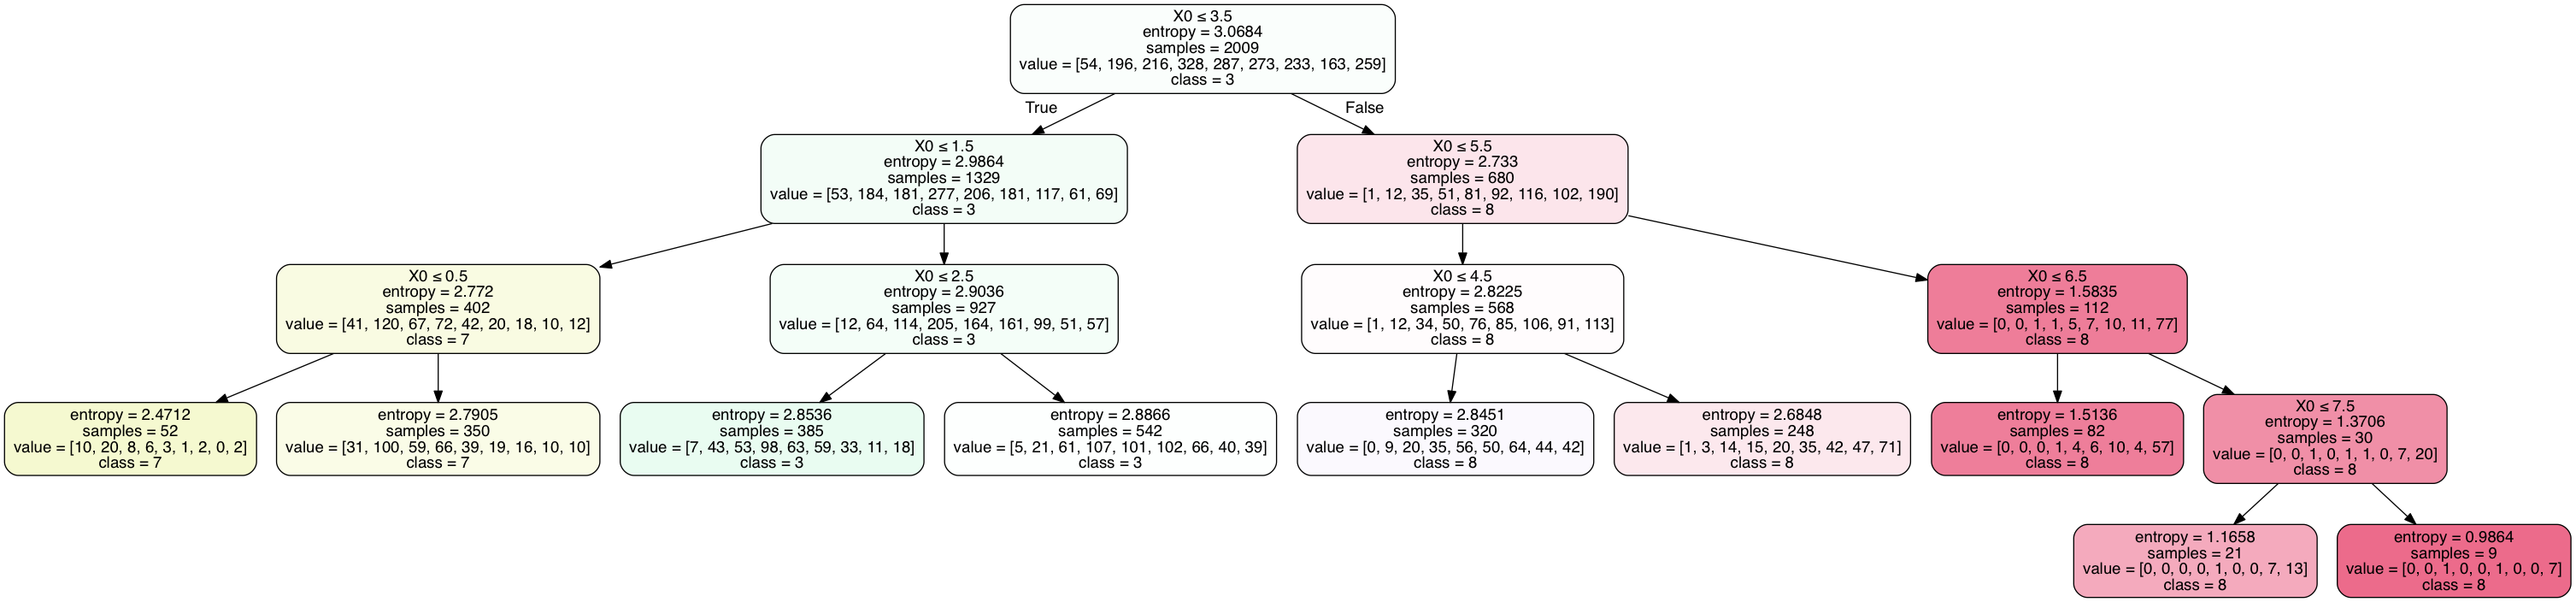

In [159]:
model1 = run_model(X1_train, Y_train, X1_test, Y_test, Y_str, "Budget")
Pred1 = model1[0]
Compare1 = model1[1]
precision1 = model1[2]

In [151]:
# model2 = run_model(X2_train, Y_train, X2_test, Y_test, Y_str, "Year")
# Pred2 = model2[0]
# Compare2 = model2[1]
# precision2 = model2[2]

In [ ]:
# model3 = run_model(X3_train, Y_train, X3_test, Y_test, Y_str, "AverageAnnualRevenue")
# Pred3 = model3[0]
# Compare3 = model3[1]
# precision3 = model3[2]

In [113]:
#Counter(Y).keys()
Counter(Y).values()

dict_values([55, 200, 224, 345, 309, 302, 284, 192, 498])

In [304]:
Y0 = list(table1['Revenue'])
Y = MoneyToCate(Y0)
X0 = list(table1['studio'])
X1 = list(table1['Budget'])
# split into 9 levelts
X1 = MoneyToCate(X1)
X1 = Nested(X1)
X2 = list(table1['Year'])
X2 = Nested(X2)
X3 = list(table1['Annual Average Revenue'])
# split into 9 levelts
X3 = MoneyToCate(X3)
X3 = Nested(X3)

In [305]:
s0 = pd.Series(X0)
X0 = pd.get_dummies(s0).values.tolist()
# s1 = pd.Series(X1)
# X1 = pd.get_dummies(s1).values.tolist()
# 
# #s2 = pd.Series(X2)
# #X2 = pd.get_dummies(s2).values.tolist()
# s3 = pd.Series(X3)
# X3 = pd.get_dummies(s3).values.tolist()

In [306]:
##combine some futures
# i = 0
# for x,y,z,m in zip(X0, X1, X2, X3):
#     X1[i] = x + y
#     X2[i] = x + y + z
#     X3[i] = x + y + z + m
#     i += 1

In [352]:
table1[~msk].shape

(21, 41)

In [375]:
np.random.rand(2)<0.2

array([ True, False], dtype=bool)

In [402]:
msk = np.asarray([True]*2000 + [False]*100 + [True]*309)
#msk = np.random.rand(len(Y)) < 0.1
Y_train = np.asarray(Y)[msk].tolist()
Y_test = np.asarray(Y)[~msk].tolist()
#Y_train = Y[400:]
# Y_test = Y[0:400]
Y_str = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]
X0_train = np.asarray(X0)[msk].tolist()
X0_test = np.asarray(X0)[~msk].tolist()
# X0_train = X0[400:]
# X0_test = X0[0:400]
X1_train = np.asarray(X1)[msk].tolist()
X1_test = np.asarray(X1)[~msk].tolist()
X2_train = np.asarray(X2)[msk].tolist()
X2_test = np.asarray(X2)[~msk].tolist()
X3_train = np.asarray(X3)[msk].tolist()
X3_test = np.asarray(X3)[~msk].tolist()

In [403]:
model0 = run_model(X0_train, Y_train, X0_test, Y_test, Y_str, "studio")
Pred0 = model0[0]
Compare0 = model0[1]
precision0 = model0[2]

model1 = run_model(X1_train, Y_train, X1_test, Y_test, Y_str, "budget")
Pred1 = model1[0]
Compare1 = model1[1]
precision1 = model1[2]

model2 = run_model(X2_train, Y_train, X2_test, Y_test, Y_str, "Year")
Pred2 = model2[0]
Compare2 = model2[1]
precision2 = model2[2]

model3 = run_model(X3_train, Y_train, X3_test, Y_test, Y_str, "Annual Average Revenue")
Pred3 = model3[0]
Compare3 = model3[1]
precision3 = model3[2]

In [404]:
#list(zip(Pred, Pred1, Pred2, Pred3, Y_test, Pred_final, Compare_final))

In [405]:
Pred_final = Majority(zip(Pred0, Pred1, Pred2, Pred3), [precision0, precision1, precision2, precision3])
Compare_final = []
for x, y in zip(Y_test, Pred_final):
    if x == y:
        Compare_final.append(1)
    else:
        Compare_final.append(0)

In [406]:
precision_final = sum(Compare_final)/len(Compare_final)
[precision0, precision1, precision2, precision3, precision_final]

[0.15, 0.27, 0.11, 0.06, 0.23]